In [1]:
import pandas as  pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
data=pd.read_csv("Customer Churn.csv")

In [7]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [17]:
data.shape

(7043, 21)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [24]:
##in totalCharges we have blank value by checking with the help of excel and we will change its data type to float

In [26]:
data["TotalCharges "]=data["TotalCharges"].replace(" ","0")
data["TotalCharges "]=data["TotalCharges "].astype(float)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


data.isnull().sum()

In [36]:
data.isnull().sum().sum()

0

In [38]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [ ]:
#duplicate value checking on the basis of 

In [42]:
data["customerID"].duplicated().sum()

0

In [44]:
#converting the values of SeniorCitizen o to no and 1 to yes for eaisy understandig

In [56]:
def convert(values):
    if values=="1":
        return "yes"
    else:
        return "No"
        
    

data["SeniorCitizen"]=data["SeniorCitizen"].apply (convert)


In [58]:
data.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.85
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,1889.50
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,108.15
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1840.75
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,151.65
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,820.50
6,1452-KIOVK,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No,1949.40
7,6713-OKOMC,Female,No,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No,301.90
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,3046.05
9,6388-TABGU,Male,No,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No,3487.95


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


C:\Users\ASUS\AppData\Local\Temp\ipykernel_22292\3110887880.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grp = sns.countplot(x="Churn", data=data, palette=["green", "pink"])


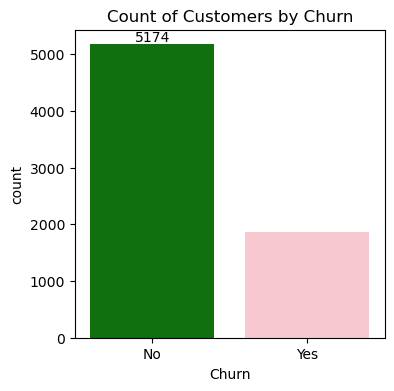

In [112]:
plt.figure(figsize=(4, 4))
grp = sns.countplot(x="Churn", data=data, palette=["green", "pink"])
grp.bar_label(grp.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

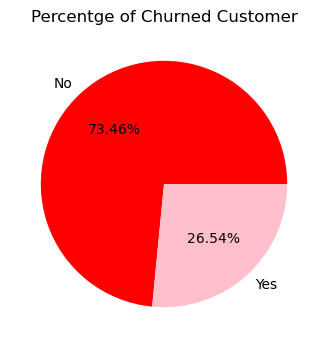

In [96]:
plt.figure(figsize=(4,4))
gb=data.groupby("Churn").agg({'Churn':'count'})
plt.pie(gb['Churn'],labels=gb.index,autopct="%1.2f%%",colors=["red","pink"])
plt.title("Percentge of Churned Customer")
plt.show()

In [114]:
#from the given pie chart we can conclude that 26.54% of customer have churen out.
#now let explore the reasons.

In [116]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'TotalCharges '],
      dtype='object')

## on the basis of gender

<function matplotlib.pyplot.show(close=None, block=None)>

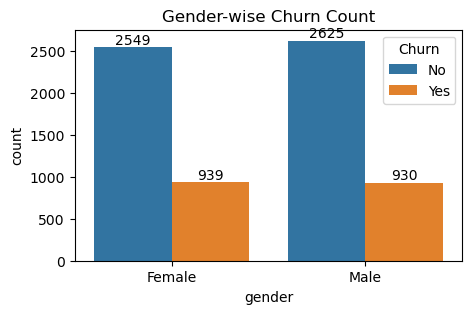

In [133]:
plt.figure(figsize=(5,3))
gen=sns.countplot(x="gender",data=data,hue="Churn")
for container in gen.containers:
    gen.bar_label(container)

plt.title("Gender-wise Churn Count")
plt.show

In [135]:
## we can not say that gender is any reason of churn because both have approximately same levels

### on the baasis of seniorCitizen

<function matplotlib.pyplot.show(close=None, block=None)>

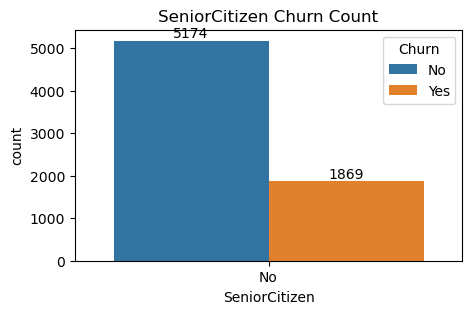

In [146]:
plt.figure(figsize=(5,3))
gen=sns.countplot(x="SeniorCitizen",data=data,hue="Churn")
for container in gen.containers:
    gen.bar_label(container)

plt.title("SeniorCitizen Churn Count")
plt.show

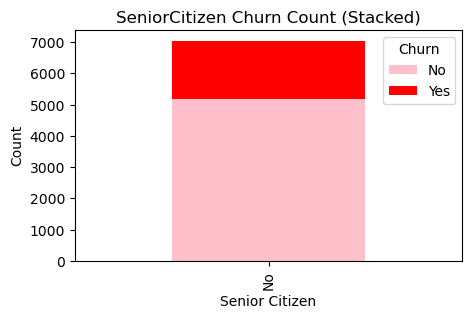

In [140]:
grouped = data.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)

# Plot a stacked bar chart
grouped.plot(kind='bar', stacked=True, figsize=(5,3), color=['pink', 'red'])

plt.title("SeniorCitizen Churn Count (Stacked)")
plt.xlabel("Senior Citizen")
plt.ylabel("Count")
plt.legend(title="Churn")
plt.show()

In [148]:
## from the above graph we can say the seniorcitize about 1869 get churned.

### on the basis of tenure

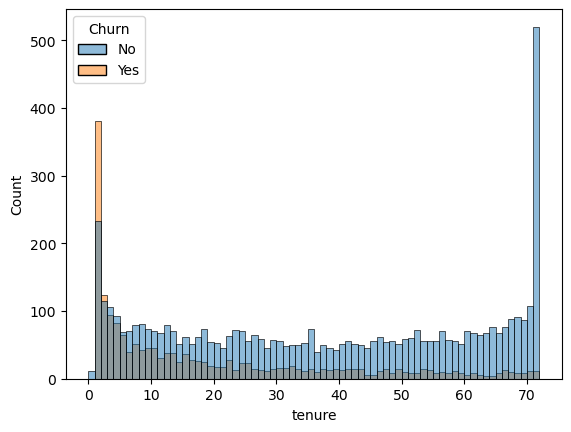

In [157]:
sns.histplot(x="tenure",data=data,bins=72,hue='Churn')
plt.show()

In [160]:
#people who have used our services for long time have stayed and people who have used for 2,3 monts get churned 

### on the basis of Contract

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22292\1623693585.py:2: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  grp = sns.countplot(x="Contract", data=data, hue="Churn",palette=["green", "pink","orange"])


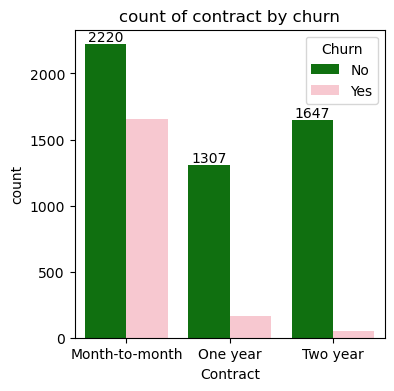

In [166]:
plt.figure(figsize=(4, 4))
grp = sns.countplot(x="Contract", data=data, hue="Churn",palette=["green", "pink","orange"])
grp.bar_label(grp.containers[0])
plt.title("count of contract by churn")
plt.show()

In [168]:
## people having month to month contract have more churn,than the long contract 
## it maybe dur to the sive provided by the compny to month to month user is not good

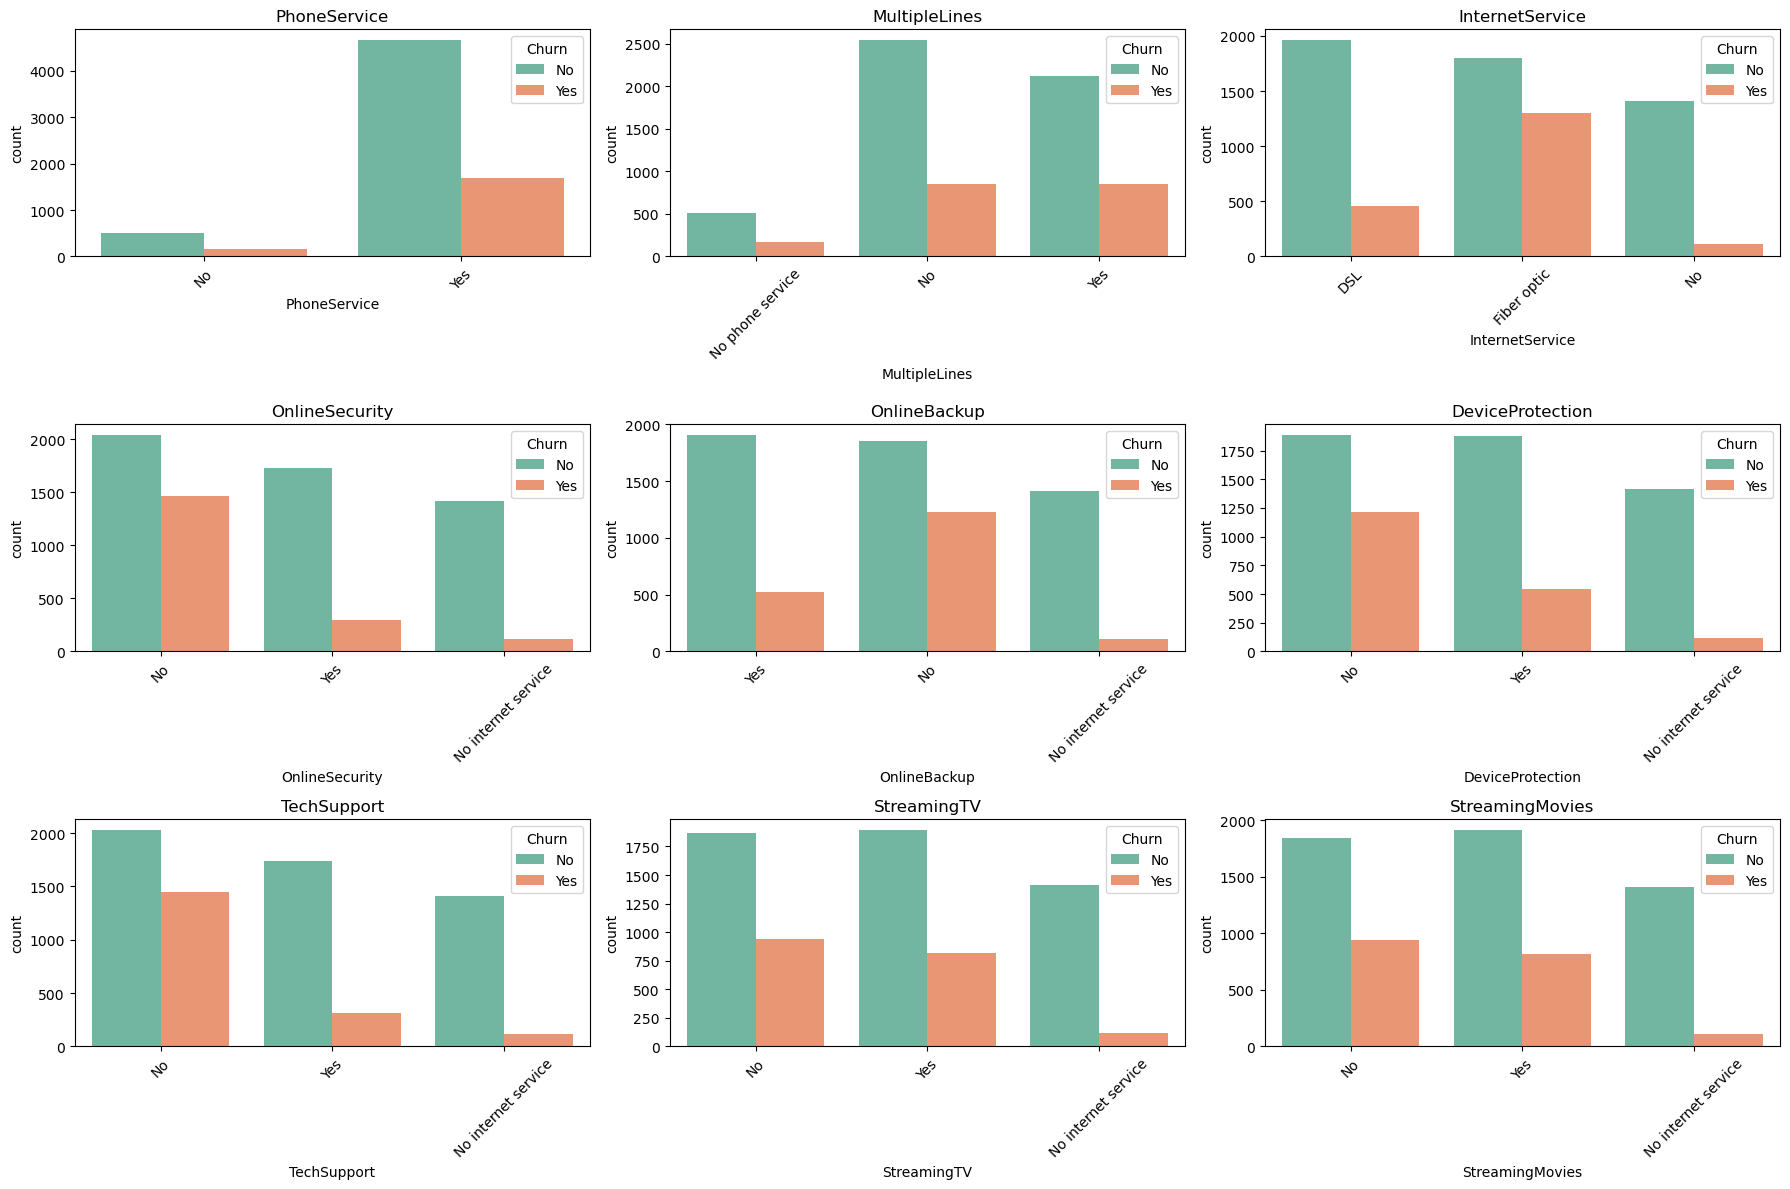

In [180]:


# Assuming your DataFrame is called df
cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
        'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 12))  # 3 rows, 3 columns

# Flatten axes array for easy iteration
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.countplot(data=data, x=col, hue="Churn",ax=axes[i], palette='Set2')
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x labels if needed

plt.tight_layout()
plt.show()


In [182]:
#Customers without services like PhoneService, InternetService, OnlineSecurity, TechSupport, and DeviceProtection show higher churn rates compared to those who have them.
#Also, customers who have No for services like StreamingTV, StreamingMovies, and OnlineBackup seem more likely to churn.
#In general, having more services seems to be linked with lower churn, while lack of services increases the risk of customer loss.
#Thus, bundling multiple services could be a strategy to reduce churn and retain customers.

### on the basis of payment method

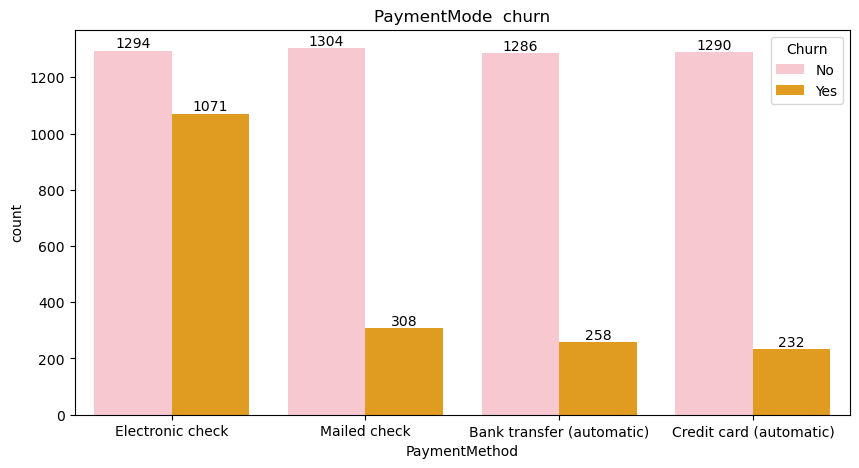

In [195]:
plt.figure(figsize=(10, 5))
grp = sns.countplot(x="PaymentMethod", data=data, hue="Churn",palette=[ "pink","orange"])
grp.bar_label(grp.containers[0])
grp.bar_label(grp.containers[1])
plt.title("PaymentMode  churn")
plt.show()

In [ ]:
# electroniv check have highest num of customer churn